In [1]:
!pip install wbdata
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import wbdata


  Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9


Key '-36289202081336501' not in persistent cache.
Key '2998582222963489486' not in persistent cache.
Key '8566083961679220158' not in persistent cache.
Key '-1981575803630139974' not in persistent cache.
Key '658934197588650949' not in persistent cache.
Key '3469937585105936916' not in persistent cache.
Key '-2225536082737782749' not in persistent cache.
Key '6766376090054119673' not in persistent cache.
Key '-3820051982636562684' not in persistent cache.
Key '-8161298469107547674' not in persistent cache.
Key '5526093491881453026' not in persistent cache.
Key '5557699894831077477' not in persistent cache.
Key '8180042503069096925' not in persistent cache.
Key '4678412026394593618' not in persistent cache.
Key '915382232739066574' not in persistent cache.
Key '3726385620256352541' not in persistent cache.
Key '4434451747286950843' not in persistent cache.
Key '199425846169379985' not in persistent cache.
Key '-429427179431668902' not in persistent cache.
Key '5138074559284061770' not i

In [4]:
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [5]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

print(variables)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [6]:
df = wbdata.get_dataframe(variables,country="WLD")
print(df.query("date=='2020'").sum(axis=0))

Males 0004      348811843.0
Males 0509      350830365.0
Males 1014      336664280.0
Males 1519      319156718.0
Males 2024      307679629.0
Males 2529      306211726.0
Males 3034      306266705.0
Males 3539      278640311.0
Males 4044      248236670.0
Males 4549      239355352.0
Males 5054      220278991.0
Males 5559      189860508.0
Males 6064      154440614.0
Males 6569      126205526.0
Males 7074       87911407.0
Males 7579       55248473.0
Males 80UP       57359239.0
Females 0004    329041541.0
Females 0509    329195144.0
Females 1014    315193137.0
Females 1519    299084307.0
Females 2024    289085215.0
Females 2529    290518089.0
Females 3034    293649516.0
Females 3539    269532767.0
Females 4044    242130383.0
Females 4549    236434353.0
Females 5054    221422176.0
Females 5559    195883003.0
Females 6064    165529683.0
Females 6569    141960156.0
Females 7074    103925353.0
Females 7579     70455922.0
Females 80UP     94006592.0
dtype: float64


In [7]:
## Nambia population pyramid

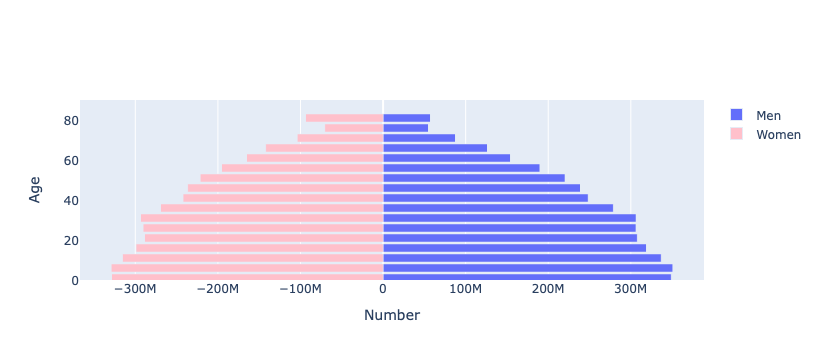

In [8]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2020

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='light blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

In [9]:
# With changes over time


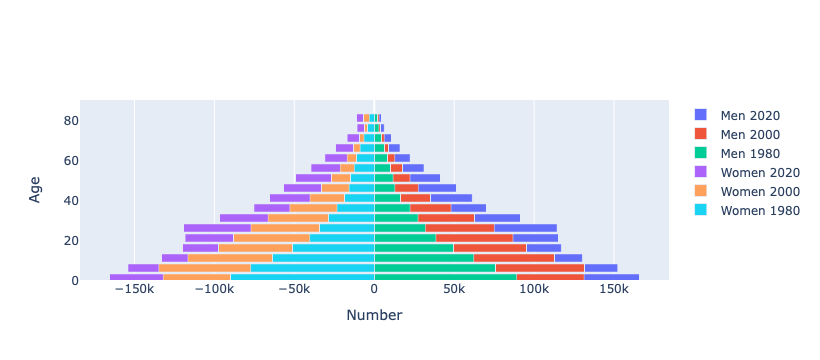

In [10]:
# Nambia's population, instead of "WLD"
df = wbdata.get_dataframe(variables,country="NAM")
# Year increments
years = range(2020,1960,-20)


bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years] 
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))

In [11]:
### Extra: Animated Population Pyramid

In [12]:
def ages_range():
    ls = [] # List
    #Five year increments
    for i in range(0,80,5):
        ls += [(f"{i:02d}"+f"{i+4:02d}")]
    ls = ls + ["80UP"]
    return ls
def pop_dataframe(setting):
    catgry = catgry_ls()
    try:
        pop = wbdata.get_dataframe(catgry,country=setting)
        return pop
    except:
        print(f'Could Not Return valid Dataframe for {setting}')
        return 'Invalid Country'
def catgry_ls():
    ls = [] 
    for i in range(0,80,5):
        ls += [(f"{i:02d}"+f"{i+4:02d}")]
    ls = ls + ["80UP"]
    fem_catgry = {"SP.POP."+s+".FE":"Females "+s for s in ls} #Female 
    mal_catgry = {"SP.POP."+s+".MA":"Males "+s for s in ls} # Male  

    catgry = {**mal_catgry, **fem_catgry}
    return catgry
def anim_pyr(pop, years):
    py.init_notebook_mode(connected=True)
    layout = go.Layout(
        barmode='overlay',
        yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
        xaxis=go.layout.XAxis(title='Number'),
        title=dict(text='Initial Plot Title', x=0.5, font=dict(color='black', family='Arial', size=32))
    )
    ls = ages_range()
    frames = [go.Frame(
        data=[
            go.Bar(
                y=[int(s[:2]) + 1 for s in ls],
                x=pop.loc[str(year), :].filter(regex="Male").values,
                name = 'Male',
                marker=dict(color='light blue'),
                orientation='h',
            ),
            go.Bar(
                y = [int(s[:2]) + 1 for s in ls],
                x = -pop.loc[str(year), :].filter(regex="Female").values,
                name = 'Female',
                marker=dict(color = 'pink'),
                orientation='h',
            )
        ],
        name=str(year),
    ) for year in years]
    fig = go.Figure(data=frames[0]['data'],frames=frames, layout=layout)
    fig.update_yaxes(title_text='Age Range (0 -4 years)')
    fig.update_xaxes(title_text='Population')
    fig.update_layout(title_text=f'Nambias Population Pyramid from {years[0]} to {years[-1]}')
    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                                method='animate', args=[None, dict(frame=dict(duration=480, redraw=True),
                                                fromcurrent=True)])])])
    fig.update_layout(sliders=[dict(yanchor='top', xanchor='left', currentvalue=dict(font=dict(size=16),
                              prefix='Year:', visible=True, xanchor='right'), transition=dict(duration=320, easing='cubic-in-out'),
                              steps=[dict(args=[[frame.name], dict(frame=dict(duration=300, redraw=True), mode='immediate',
                              transition=dict(duration=300))], label=str(frame.name), method='animate') for frame in frames])])
    
    fig.show()

In [ ]:
rangeyear = np.arange(1970, 2020)
pop = pop_dataframe("NAM")
anim_pyr(pop, rangeyear)